In [1]:
import mysql.connector as connection
import pandas as pd
import numpy as np
import os
import urllib
%matplotlib inline
import matplotlib.pyplot as plt
try:
    mydb = connection.connect(host=os.environ.get("DB_HOST"), database = os.environ.get("DB_NAME"),user=os.environ.get("DB_USER"), passwd=os.environ.get("DB_PASSWORD"),use_pure=True)
    query = "Select * from nba_clean;"
    nba_df = pd.read_sql(query,mydb)
    mydb.close() #close the connection
except Exception as e:
    mydb.close()
    print(str(e))

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [3]:
f_df = pd.DataFrame()
df = nba_df['count'] >= 1
nb_df = nba_df[df]
player_names = pd.unique(nb_df[['PLAYER_NAME']].values.ravel())
#i = 0
#leng = len(player_names)
#while i <= leng-1:
for players in player_names:
    filter_data = nba_df[nba_df['PLAYER_NAME']== players]
    df2 = {'SEASON_ID':'2022-23','PLAYER_NAME':players,'TEAM_ABBREVIATION':filter_data['TEAM_ABBREVIATION'][filter_data.index[-1]],'AGE':(filter_data['AGE'][filter_data.index[-1]]+1)}
    filter_data = filter_data.append(df2, ignore_index = True)
    #print(filter_data)
    #filtered_data = filter_data.drop(['TEAM_ABBREVIATION', 'PLAYER_NAME', 'SEASON_ID'],axis = 1, inplace=True)
    filtered_data = filter_data.iloc[:-1 , :]
    #print(filtered_data)
    stats_list = list(filtered_data)
    #print(stats_list)
    j = 4
    length = len(stats_list)
    #print(players)
    while j <= length-1:
    #for stats in stats_list:
        stat = stats_list[j]
        #print(stat)
        X = filtered_data[['AGE']].values
        #X = X.reshape(1, -1)
        #print(X)
        y = filtered_data[[stat]].values
        #y = y.reshape(1, -1)
        #print(y)
        if len(X) == 1:
            X = np.repeat(X, 2)
            X = X.reshape(-1,1)
            y = np.repeat(y, 2)
            y = y.reshape(-1,1)
        x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=1)
        clf = DecisionTreeRegressor()
        clf = clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        y_pred = y_pred.flatten()
        pred_y_df = pd.DataFrame({"AGE":filter_data['AGE'][filter_data.index[-1]], stat:y_pred})
        pred_y_df[stat]= pred_y_df[stat].round(decimals = 0)
        st = pred_y_df[stat].tolist()
        value = st[0]
        size = len(filter_data)-1
        index = filter_data.columns.get_loc(stat)
        filter_data.iloc[size,index] = value
        j+=1
    last_row = filter_data.tail(1)
    f_df = f_df.append(last_row, ignore_index = True)
    print(players)
    #i+=1
    #print(i)
print(f_df)

Aaron Gordon
Aaron Henry
Aaron Holiday
Aaron Nesmith
Aaron Wiggins
Abdel Nader
Admiral Schofield
Al Horford
Al-Farouq Aminu
Alec Burks
Alekesej Pokusevski
Alex Caruso
Alex Len
Alize Johnson
Alperen Sengun
Amir Coffey
Andre Drummond
Andre Iguodala
Andrew Wiggins
Anfernee Simons
Anthony Davis
Anthony Edwards
Anthony Gill
Anthony Lamb
Armoni Brooks
Arnoldas Kulboka
Austin Reaves
Austin Rivers
Avery Bradley
Ayo Dosunmu
Bam Adebayo
Ben McLemore
Ben Simmons
Blake Griffin
Boban Marjanovic
Bobby Portis
Bogdan Bogdanovic
Bojan Bogdanovic
Bol Bol
Bones Hyland
Bradley Beal
Brandon Boston
Brandon Clarke
Brandon Ingram
Brian Bowen II
Brodric Thomas
Brook Lopez
Bruce Brown
Bruno Fernando
Bryn Forbes
Buddy Hield
CJ Elleby
CJ McCollum
Cade Cunningham
Caleb Martin
Cam Reddish
Cam Thomas
Cameron Johnson
Cameron Oliver
Cameron Payne
Caris LeVert
Carlik Jones
Carmelo Anthony
Cassius Stanley
Cassius Winston
Cedi Osman
Chandler Hutchison
Charles Bassey
Chasson Randle
Chaundee Brown Jr.
Chimezie Metu
Chris B

In [4]:
f_df.loc[f_df['GP'] >= 83]

,SEASON_ID,PLAYER_NAME,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,...,STL_ESPN,BLK_ESPN,TOV_ESPN,PF_ESPN,DD2_ESPN,TD3_ESPN,PTS_ESPN,W_ESPN,NET_ESPN,AVG_NET_ESPN


In [5]:
f_df['W_PCT'] = f_df['W'] / f_df['GP']
f_df['W_PCT'] = f_df['W_PCT'].round(decimals = 3)
f_df['FG_PCT'] = f_df['FGM'] / f_df['FGA']
f_df['FG_PCT'] = f_df['FG_PCT'].round(decimals = 3)
f_df['FG3_PCT'] = f_df['FG3M'] / f_df['FG3A']
f_df['FG3_PCT'] = f_df['FG3_PCT'].round(decimals = 3)
f_df['FT_PCT'] = f_df['FTM'] / f_df['FTA']
f_df['FT_PCT'] = f_df['FT_PCT'].round(decimals = 3)
f_df

,SEASON_ID,PLAYER_NAME,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,...,STL_ESPN,BLK_ESPN,TOV_ESPN,PF_ESPN,DD2_ESPN,TD3_ESPN,PTS_ESPN,W_ESPN,NET_ESPN,AVG_NET_ESPN
0,2022-23,Aaron Gordon,DEN,27.0,50.0,29.0,21.0,0.580,1384.0,231.0,...,132.0,136.0,-194.0,0.0,0.0,0.0,618.0,0.0,1268.0,15.0
1,2022-23,Aaron Henry,PHI,23.0,6.0,6.0,0.0,1.000,17.0,1.0,...,0.0,8.0,-4.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0
2,2022-23,Aaron Holiday,PHX,26.0,66.0,30.0,36.0,0.455,1176.0,170.0,...,184.0,52.0,-132.0,0.0,0.0,0.0,475.0,0.0,870.0,11.0
3,2022-23,Aaron Nesmith,BOS,23.0,52.0,32.0,20.0,0.615,574.0,72.0,...,80.0,20.0,-62.0,0.0,0.0,0.0,196.0,0.0,355.0,4.0
4,2022-23,Aaron Wiggins,OKC,24.0,50.0,13.0,37.0,0.260,1209.0,156.0,...,120.0,40.0,-108.0,0.0,0.0,0.0,416.0,0.0,776.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,2022-23,Zach LaVine,CHI,28.0,58.0,26.0,32.0,0.448,2034.0,569.0,...,184.0,108.0,-406.0,0.0,0.0,0.0,1591.0,0.0,2500.0,30.0
566,2022-23,Zeke Nnaji,DEN,22.0,41.0,24.0,17.0,0.585,698.0,96.0,...,64.0,52.0,-46.0,0.0,0.0,0.0,270.0,0.0,540.0,7.0
567,2022-23,Ziaire Williams,MEM,21.0,62.0,41.0,21.0,0.661,1346.0,191.0,...,140.0,48.0,-82.0,0.0,0.0,0.0,501.0,0.0,888.0,11.0
568,2022-23,Zion Williamson,NOP,21.0,61.0,29.0,32.0,0.475,2026.0,634.0,...,228.0,156.0,-334.0,0.0,0.0,0.0,1647.0,0.0,2671.0,33.0


In [6]:
col_name = ['GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK','DD2_RANK', 'TD3_RANK']
col_rank = ['GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'DD2', 'TD3']
#print(len(col_name))
#print(len(col_rank))
for (name,rank) in zip(col_name, col_rank):
    f_df[name] = f_df.groupby(['SEASON_ID'])[rank].rank(ascending = False)
    f_df[name] = f_df[name].round(decimals = 0)
print(f_df)

    SEASON_ID      PLAYER_NAME TEAM_ABBREVIATION   AGE    GP     W     L  \
0     2022-23     Aaron Gordon               DEN  27.0  50.0  29.0  21.0   
1     2022-23      Aaron Henry               PHI  23.0   6.0   6.0   0.0   
2     2022-23    Aaron Holiday               PHX  26.0  66.0  30.0  36.0   
3     2022-23    Aaron Nesmith               BOS  23.0  52.0  32.0  20.0   
4     2022-23    Aaron Wiggins               OKC  24.0  50.0  13.0  37.0   
..        ...              ...               ...   ...   ...   ...   ...   
565   2022-23      Zach LaVine               CHI  28.0  58.0  26.0  32.0   
566   2022-23       Zeke Nnaji               DEN  22.0  41.0  24.0  17.0   
567   2022-23  Ziaire Williams               MEM  21.0  62.0  41.0  21.0   
568   2022-23  Zion Williamson               NOP  21.0  61.0  29.0  32.0   
569   2022-23   Zylan Cheatham               UTA  27.0   1.0   0.0   1.0   

     W_PCT     MIN    FGM  ...  STL_ESPN  BLK_ESPN  TOV_ESPN  PF_ESPN  \
0    0.580  13

In [7]:
f_df['PER'] = (f_df['FGM'] * 85.910 + f_df['STL'] * 53.897 + f_df['FG3M'] * 51.757 + f_df['FTM'] * 46.845 + f_df['BLK'] * 39.190 + f_df['OREB'] * 39.190 + f_df['AST'] * 34.677 + f_df['DREB'] * 14.707 - f_df['PF'] * 17.174 - (f_df['FTA'] - f_df['FTM']) * 20.091 - (f_df["FGA"] - f_df["FGM"]) * 39.190 - f_df['TOV'] * 53.897)* (1 / f_df['MIN'])
f_df['PER'] = f_df['PER'].round(decimals = 3)

In [8]:
f_df['PER_RANK'] = f_df.groupby(["SEASON_ID"])["PER"].rank(ascending = False)

In [9]:
f_df['NBA_FANTASY_PTS_RANK_ESPN'] = f_df.groupby(["SEASON_ID"])["AVG_NET_ESPN"].rank(ascending = False)
f_df.sort_values(by = ['NBA_FANTASY_PTS_RANK_ESPN'], inplace = True)
f_df

,SEASON_ID,PLAYER_NAME,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,...,PF_ESPN,DD2_ESPN,TD3_ESPN,PTS_ESPN,W_ESPN,NET_ESPN,AVG_NET_ESPN,PER,PER_RANK,NBA_FANTASY_PTS_RANK_ESPN
422,2022-23,Nikola Jokic,DEN,28.0,72.0,47.0,25.0,0.653,2488.0,732.0,...,0.0,0.0,0.0,1898.0,0.0,4215.0,51.0,36.029,1.0,1.0
353,2022-23,LeBron James,LAL,38.0,79.0,57.0,22.0,0.722,3063.0,758.0,...,0.0,0.0,0.0,2111.0,0.0,3900.0,48.0,26.811,14.0,2.0
150,2022-23,Dwight Howard,LAL,37.0,78.0,51.0,27.0,0.654,2935.0,619.0,...,0.0,0.0,0.0,1784.0,0.0,3534.0,43.0,25.785,22.0,3.5
74,2022-23,Chris Paul,PHX,38.0,80.0,45.0,35.0,0.562,2880.0,430.0,...,0.0,0.0,0.0,1268.0,0.0,3533.0,43.0,22.994,47.0,3.5
128,2022-23,Derrick Rose,NYK,34.0,81.0,62.0,19.0,0.765,3026.0,711.0,...,0.0,0.0,0.0,2026.0,0.0,3464.0,42.0,23.594,37.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,2022-23,Moses Wright,DAL,24.0,4.0,4.0,0.0,1.000,15.0,1.0,...,0.0,0.0,0.0,5.0,0.0,14.0,0.0,19.068,123.0,543.0
158,2022-23,Emanuel Terry,PHX,26.0,3.0,2.0,1.0,0.667,18.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.310,553.0,543.0
163,2022-23,Eugene Omoruyi,DAL,26.0,4.0,1.0,3.0,0.250,18.0,2.0,...,0.0,0.0,0.0,7.0,0.0,16.0,0.0,19.246,115.0,543.0
105,2022-23,David Johnson,TOR,22.0,2.0,2.0,0.0,1.000,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,-0.0,-19.595,567.0,543.0


In [10]:
column_espn = list(f_df)

In [11]:
f_espn_df = f_df[['SEASON_ID', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE', 'NBA_FANTASY_PTS_RANK_ESPN', 'NET_ESPN', 'AVG_NET_ESPN']]
stats_df = f_df[['SEASON_ID', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'DD2', 'TD3', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'DD2_RANK', 'TD3_RANK']]

In [12]:
from sqlalchemy import create_engine
from pandas.io import sql
import pymysql
import mysql.connector
mydb = mysql.connector.connect(
  host=os.environ.get("DB_HOST"),
  user=os.environ.get("DB_USER"),
  password=os.environ.get("DB_PASSWORD"),
  database=os.environ.get("DB_NAME")
)

mycursor = mydb.cursor()

sql = "DROP TABLE IF EXISTS espn_pred_DTR"

mycursor.execute(sql)

In [13]:
# Credentials to database connection
hostname=os.environ.get("DB_HOST")
dbname=os.environ.get("DB_NAME")
uname=os.environ.get("DB_USER")
pwd=os.environ.get("DB_PASSWORD")

# Create SQLAlchemy engine to connect to MySQL Database
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
				.format(host=hostname, db=dbname, user=uname, pw=pwd))
f_espn_df.to_sql('espn_pred_DTR', engine, index=False)
mydb.close()

In [14]:
mvp_cutoff = 100
f_100_df = f_espn_df[f_espn_df['NBA_FANTASY_PTS_RANK_ESPN'] <= mvp_cutoff]
print(f_100_df)

    SEASON_ID      PLAYER_NAME TEAM_ABBREVIATION   AGE  \
422   2022-23     Nikola Jokic               DEN  28.0   
353   2022-23     LeBron James               LAL  38.0   
150   2022-23    Dwight Howard               LAL  37.0   
74    2022-23       Chris Paul               PHX  38.0   
128   2022-23     Derrick Rose               NYK  34.0   
..        ...              ...               ...   ...   
79    2022-23       Coby White               CHI  23.0   
161   2022-23      Eric Gordon               HOU  34.0   
402   2022-23     Monte Morris               DEN  28.0   
52    2022-23      CJ McCollum               NOP  31.0   
433   2022-23  P.J. Washington               CHA  24.0   

     NBA_FANTASY_PTS_RANK_ESPN  NET_ESPN  AVG_NET_ESPN  
422                        1.0    4215.0          51.0  
353                        2.0    3900.0          48.0  
150                        3.5    3534.0          43.0  
74                         3.5    3533.0          43.0  
128               

In [15]:
mydb = mysql.connector.connect(
  host=os.environ.get("DB_HOST"),
  user=os.environ.get("DB_USER"),
  password=os.environ.get("DB_PASSWORD"),
  database=os.environ.get("DB_NAME")
)

mycursor = mydb.cursor()

sql = "DROP TABLE IF EXISTS espn_100_DTR"

mycursor.execute(sql)
# Credentials to database connection
hostname=os.environ.get("DB_HOST")
dbname=os.environ.get("DB_NAME")
uname=os.environ.get("DB_USER")
pwd=os.environ.get("DB_PASSWORD")

# Create SQLAlchemy engine to connect to MySQL Database
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
				.format(host=hostname, db=dbname, user=uname, pw=pwd))
f_100_df.to_sql('espn_100_DTR', engine, index=False)
mydb.close()

<AxesSubplot:xlabel='PLAYER_NAME'>

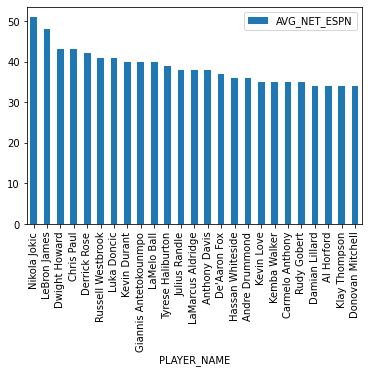

In [16]:
mvp_cutoff = 25
top_mvp_rankings_df = f_df[f_df['NBA_FANTASY_PTS_RANK_ESPN'] <= mvp_cutoff]
top_mvp_rankings_df.plot.bar(x = "PLAYER_NAME", y = 'AVG_NET_ESPN')

In [17]:
#f_100_df.to_csv('100_DTR.csv',index=False)